Настройка числа кластеров в алгоритме K-Means. Elbow и Silhouette метод.
Цель: Используя данный датасет https://archive.ics.uci.edu/ml/datasets/Wholesale+customers произвести кластеризацию методом k-means. Проверить оптимальное число k с применением silhouette score методом локтя(elbow).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8) REGION: customers Region - Lisnon, Oporto or Other (Nominal)


Dataset includes information about 440 clients total.

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


To select number of clusters we will use silhouette analysis on KMeans clustering.

SkLearn KMeans method + inertia  §2.3.2: [https://scikit-learn.org/stable/modules/clustering.html]

SkLearn silhouette_score: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html]

In [6]:
range_n_clusters = range(1, 15)
range_n_clusters

range(1, 15)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

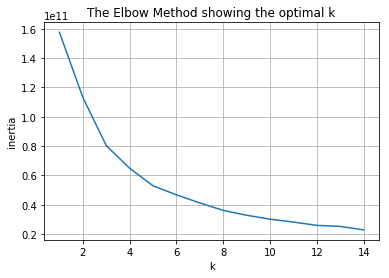

In [7]:
inertia = []
k = range(1, 15)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(data.drop(['Channel', 'Region'], axis = 1))
    km.fit(data.drop(['Channel', 'Region'], axis = 1))
    inertia.append(km.inertia_)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.grid()
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

The most suitable values for the number of clusters according to the "Elbow" method can be 3, 4 or 5 clusters. At these values, the slope of the inertia value changes.

Let's find the best number of clusters using silhouette_score.

[0.5115333898779053, 0.4783511430782059, 0.3866313700058197, 0.37379829601716275, 0.37842449335709616, 0.357340678486807, 0.3647506861740014, 0.31428857481820605, 0.31195165016476417, 0.29948710642974363, 0.3004957185101484, 0.2934415852141399, 0.2592134893844708]


Text(0.5, 1.0, 'The Silhouette score showing the optimal k')

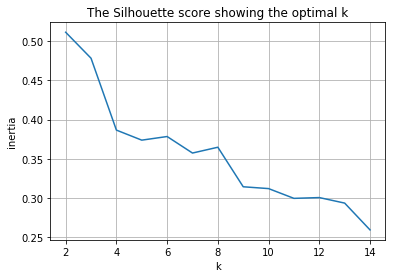

In [8]:
inertia = []
k = range(2, 15)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(data.drop(['Channel', 'Region'], axis = 1))
    km.fit(data)
    inertia.append(silhouette_score(data.drop(['Channel', 'Region'], axis = 1), km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Silhouette score showing the optimal k')

The silhouette plots shows that the n_clusters value more than 4 are bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots.

I would prefer to use the division into three clusters, since with this value the metrics are optimal, and the number of clusters already allows you to select three groups of distributors and see their characteristics.

In [9]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data.drop(['Channel', 'Region'], axis = 1))
clusters = kmeans.predict(data.drop(['Channel', 'Region'], axis = 1))

In [10]:
data_new = pd.concat((data, pd.DataFrame(clusters).rename(columns={0: "cluster"})), axis = 1)

Let's look at the characteristics of the clusters that model has identified.

Zero cluster clients are not interested in large quantities of any product. Their orders are less than average for each type of product.

Clients of the first cluster are focused on dairy products, groceries and household chemicals (Detergents_Paper?). I can assume that these are large consumer goods stores.

The third cluster is customers who focus on fresh produce and frozen products. They also purchase gourmet products. The average purchase of delicacies from them is two times higher than the average for the sample. Most likely, this cluster includes large restaurants or their suppliers.

In [11]:
data_new.drop(['Channel', 'Region'], axis = 1).groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,8341.612805,3779.893293,5152.173780,2577.237805,1720.573171,1136.542683
1,7751.981132,17910.509434,27037.905660,1970.943396,12104.867925,2185.735849
2,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847


In [12]:
# The average order size of each item among all distributors
data.drop(['Channel', 'Region'], axis = 1).mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [13]:
data_new.groupby(['Region', 'cluster']).Channel.count()

Region  cluster
1       0           57
        1           10
        2           10
2       0           35
        1            8
        2            4
3       0          236
        1           35
        2           45
Name: Channel, dtype: int64

In [14]:
data_new.groupby(['Channel', 'cluster']).Region.count()

Channel  cluster
1        0          245
         1            2
         2           51
2        0           83
         1           51
         2            8
Name: Region, dtype: int64